# Imports for plotting

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

# Download data

In [2]:
from selectionfunctions.config import config
config['data_dir'] = '../selectionfunctions/data/'

In [3]:
import selectionfunctions.cog_ii
selectionfunctions.cog_ii.fetch()

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
Checking existing file to see if MD5 sum matches ...
Checking existing file to see if MD5 sum matches ...


 96.0 MiB of 96.0 MiB | 797.9 KiB/s |################## |  99% | ETA:   0:00:00

# Simple query

In [34]:
import selectionfunctions.cog_ii as CoGII

dr2_sf = CoGII.dr2_sf(version='modelAB',crowding=True)

Loading auxilliary data ...
Loading selection function ...
Creating selection function interpolator...
t = 3.581 s
  auxilliary:   3.566 s
          sf:   0.009 s
interpolator:   0.006 s


In [35]:
from selectionfunctions.source import Source

source = Source('12h30m25.3s', '15d15m58.1s', frame='icrs', photometry={'gaia_g':21.2})

In [36]:
prob_selection = dr2_sf(source)

print('Probability of selection = {:.3f}%'.format(prob_selection*100.0))

Probability of selection = 15.158%


In [21]:
source.coord

<SkyCoord (ICRS): (ra, dec) in deg
    (187.60541667, 15.26613889)>

In [25]:
source.photometry.measurement

{'gaia_g': 21.2}

# Querying arrays of coordinates

In [26]:
import numpy as np

In [37]:
l = np.array([0., 90., 180.])
b = np.array([15., 0., -15.])
g = np.array([20.8,21.0,21.2])

source = Source(l, b, unit='deg', frame='galactic', photometry={'gaia_g':g})

prob_selection = dr2_sf(source)

print(prob_selection)

[0.99907317 0.88894535 0.56533812]


In [38]:
l = np.linspace(0., 180., 12)
b = np.zeros(12)
g = 21.0*np.ones(12)
l.shape = (3, 4)
b.shape = (3, 4)
g.shape = (3, 4)

source = Source(l, b, unit='deg', frame='galactic', photometry={'gaia_g':g})

prob_selection = dr2_sf(source)

print(prob_selection)

[[0.57746354 0.50028986 0.52164311 0.85466996]
 [0.92477365 0.94327616 0.88105409 0.90771938]
 [0.99701694 0.93294062 0.80897816 0.45075536]]


# Maps

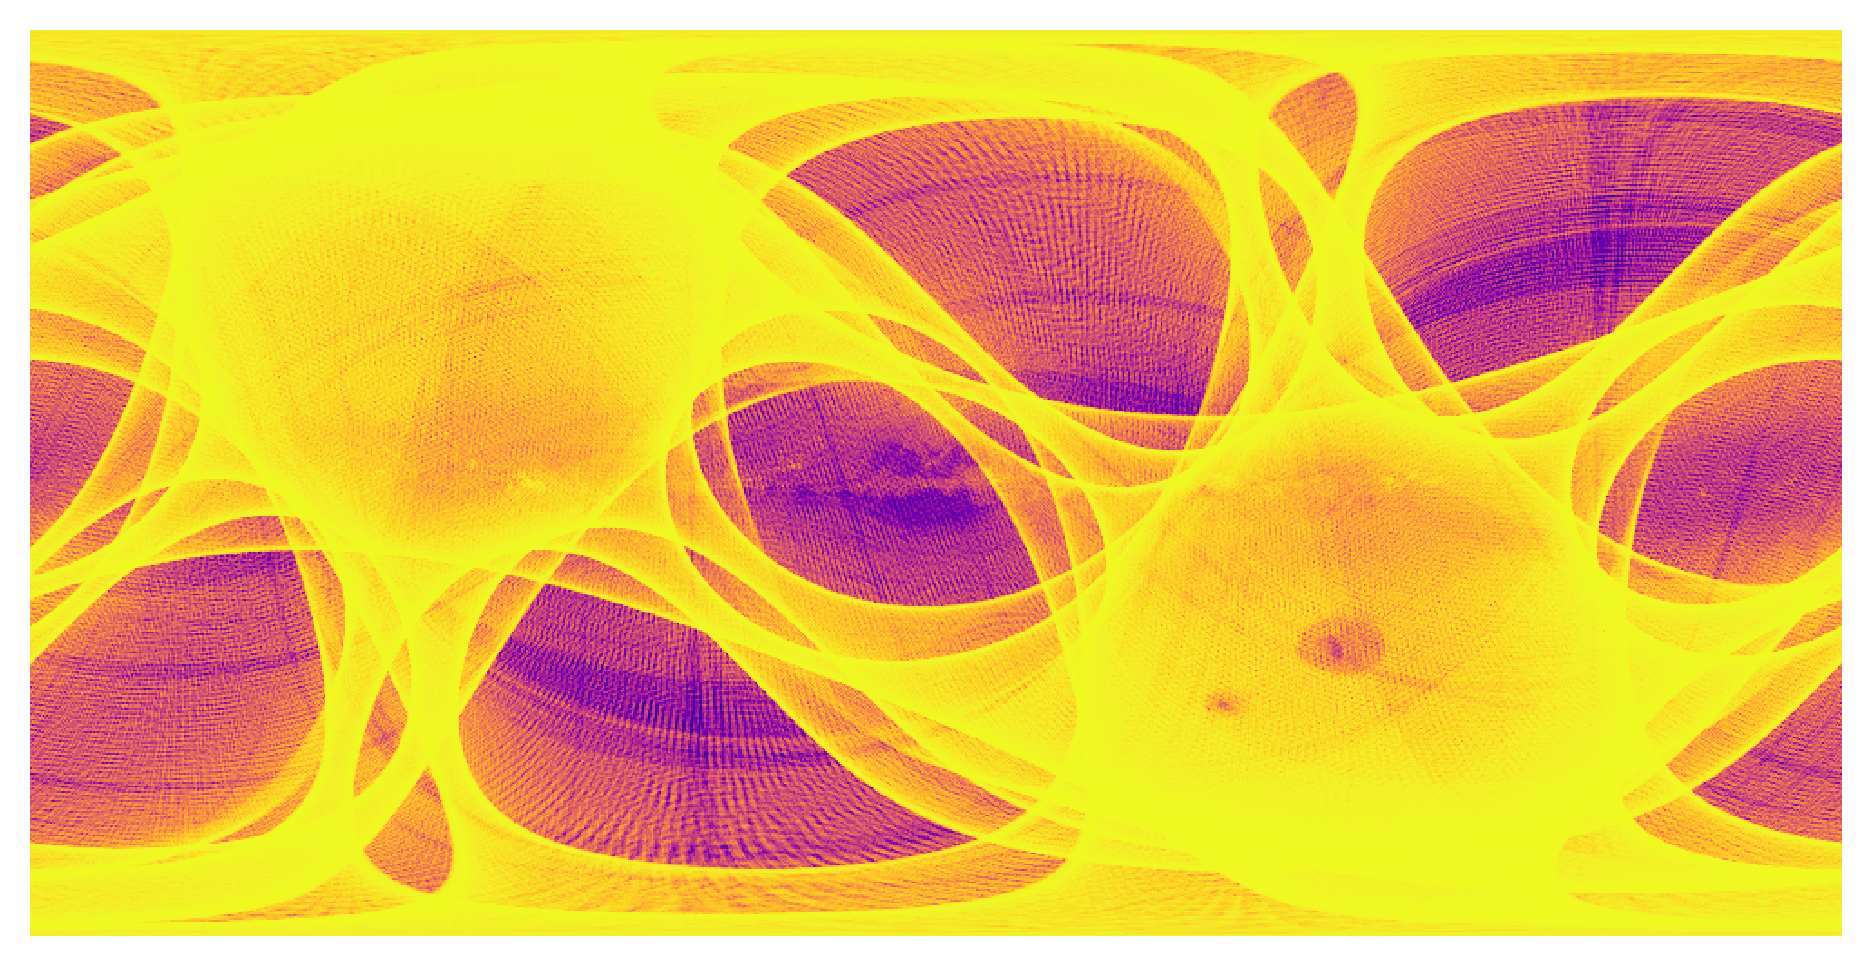

In [30]:
import astropy.units as units

l = np.linspace(-180.0, 180.0, 1000)
b = np.linspace(-90.0,90.0, 500)
l, b = np.meshgrid(l, b)
g = 21.0*np.ones(l.shape)
source = Source(l*units.deg, b*units.deg, frame='galactic', photometry={'gaia_g':g})

prob_selection = dr2_sf(source)

fig = plt.figure(figsize=(12,4), dpi=150)

plt.imshow(
        prob_selection[::,::-1],
        vmin=0.,
        vmax=1.,
        origin='lower',
        interpolation='nearest',
        cmap='plasma',
        aspect='equal',
        extent=[-180,180,-90,90]
    )

plt.axis('off')
plt.savefig('map.png', bbox_inches='tight', dpi=150)